<a href="https://colab.research.google.com/github/Rkinbag/Credit-card-fraud-analysis-using-ANN/blob/main/Fraud_analysis_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 665.5 MB 119.5 MB/s
     |████████████████████████████████| 463 kB 5.4 MB/s 
     |████████████████████████████████| 1.3 MB 51.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
    Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
credit_df = pd.read_csv("./creditcard.csv")
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
credit_df.Class.value_counts()


0    284315
1       492
Name: Class, dtype: int64

 **Highly imbalance**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X = credit_df.iloc[:,:-1]
Y = credit_df.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=100, stratify=Y)

In [7]:
Y_train.value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [8]:
Y_test.value_counts()

0    56864
1       98
Name: Class, dtype: int64

In [9]:
mmscale = MinMaxScaler()
mmscale.fit(X_train)

MinMaxScaler()

In [10]:
X_train = mmscale.transform(X_train)
X_test = mmscale.transform(X_test)

In [11]:
def get_model():
    model = Sequential()
    model.add(Dense(30,input_shape=(30,), activation='relu'))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    print(model.summary())
    return model

In [12]:
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# get the model
model = get_model()

# compile the model
model.compile(optimizer='RMSProp', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 5)                 80        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,481
Trainable params: 1,481
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
# fit the model
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=50, verbose=1,batch_size=1000)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, Y_test, verbose=0)

Epoch 1/50
206/206 [==============================] - 2s 5ms/step - loss: 0.1243 - acc: 0.9892 - f1_m: 0.0022 - precision_m: 0.0016 - recall_m: 0.0129 - val_loss: 0.0111 - val_acc: 0.9983 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/50
206/206 [==============================] - 1s 5ms/step - loss: 0.0096 - acc: 0.9983 - f1_m: 0.0157 - precision_m: 0.0291 - recall_m: 0.0109 - val_loss: 0.0077 - val_acc: 0.9984 - val_f1_m: 0.0870 - val_precision_m: 0.1304 - val_recall_m: 0.0725
Epoch 3/50
206/206 [==============================] - 1s 5ms/step - loss: 0.0067 - acc: 0.9986 - f1_m: 0.2343 - precision_m: 0.3277 - recall_m: 0.1999 - val_loss: 0.0056 - val_acc: 0.9988 - val_f1_m: 0.2739 - val_precision_m: 0.3913 - val_recall_m: 0.2333
Epoch 4/50
206/206 [==============================] - 1s 5ms/step - loss: 0.0051 - acc: 0.9989 - f1_m: 0.3738 - precision_m: 0.4780 - recall_m: 0.3318 - val_loss: 0.0045 - val_acc: 0.9989 - val_f1_m: 0.3855 - val_precisi

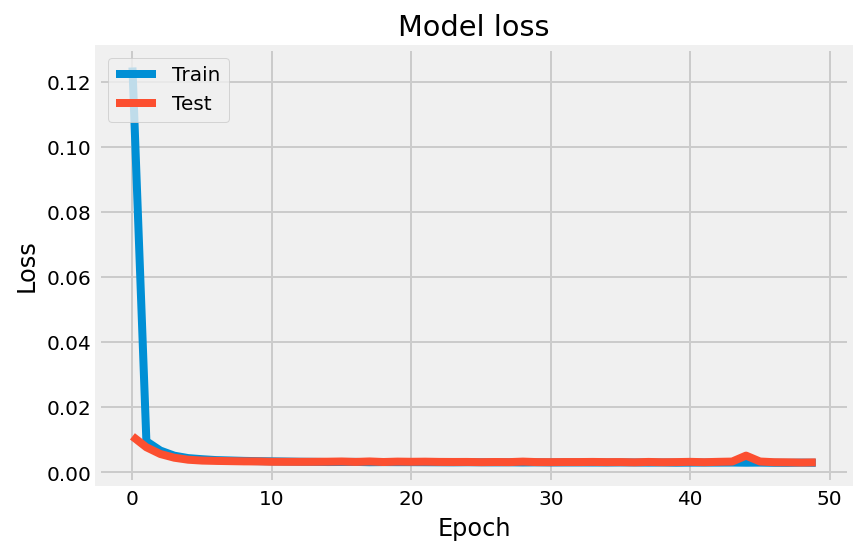

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [15]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

In [16]:
train_predictions_baseline = model.predict(X_train, batch_size=1000)
test_predictions_baseline = model.predict(X_test, batch_size=1000)

In [17]:
import sklearn
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, roc_curve

Legitimate Transactions Detected (True Negatives):  56848
Legitimate Transactions Incorrectly Detected (False Positives):  16
Fraudulent Transactions Missed (False Negatives):  23
Fraudulent Transactions Detected (True Positives):  75
Total Fraudulent Transactions:  98


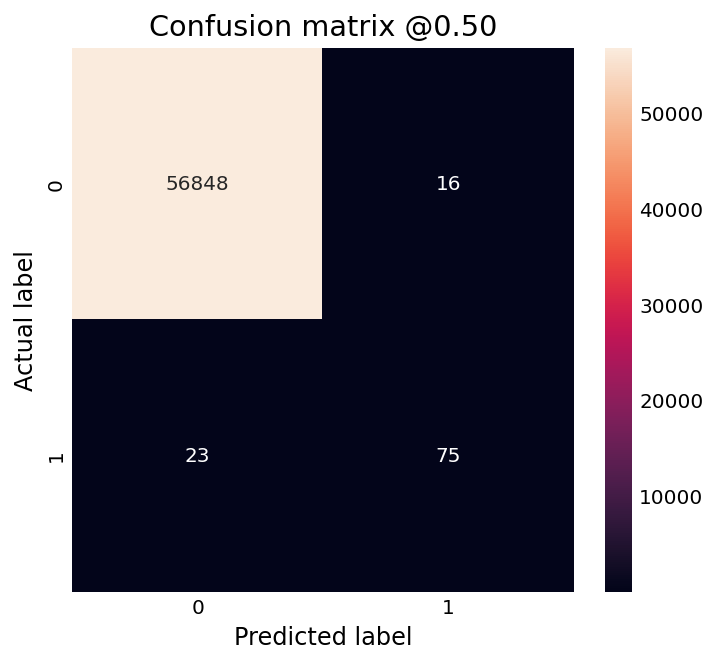

In [18]:
plot_cm(Y_test, test_predictions_baseline)

In [19]:
print(classification_report(Y_test,test_predictions_baseline>0.5))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.77      0.79        98

    accuracy                           1.00     56962
   macro avg       0.91      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [20]:
print(roc_auc_score(Y_test,test_predictions_baseline>0.5))


0.882512374674124


In [21]:
neg, pos = np.bincount(credit_df['Class'])
total = neg + pos
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.50
Weight for class 1: 289.44


In [22]:
weighted_model = get_model()
weighted_model.compile(optimizer='RMSProp', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])
history = weighted_model.fit(X_train, Y_train, validation_split=0.1, epochs=50, verbose=1,batch_size=1000, class_weight=class_weight)
loss, accuracy, f1_score, precision, recall = weighted_model.evaluate(X_test, Y_test, verbose=0)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                930       
                                                                 
 dense_5 (Dense)             (None, 15)                465       
                                                                 
 dense_6 (Dense)             (None, 5)                 80        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,481
Trainable params: 1,481
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
206/206 [==============================] - 4s 10ms/step - loss: 0.5609 - acc: 0.5378 - f1_m: 0.0272 - precision_m: 0.0148 - recall_m: 0.7360 - val_loss: 0.6352 - val_ac

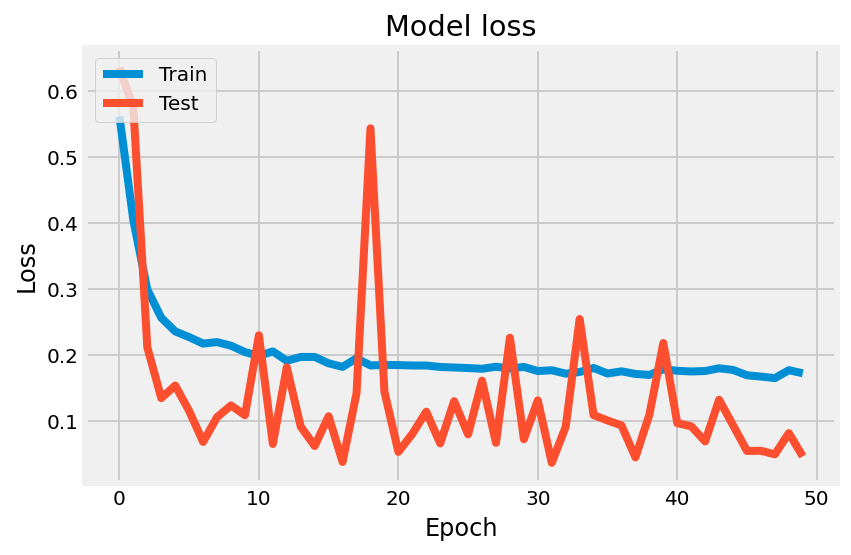

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [25]:
def find_optimal_cutoff(target, predicted):
  
  
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    fig, ax = plt.subplots()
    plt.plot(tpr)
    plt.plot(1-fpr, color = 'red')
    plt.xlabel('1-False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    ax.set_xticklabels([])
    return list(roc_t['threshold']) 

In [27]:
test_predictions_weighted = weighted_model.predict(X_test, batch_size=1000)


[0.04543694853782654]

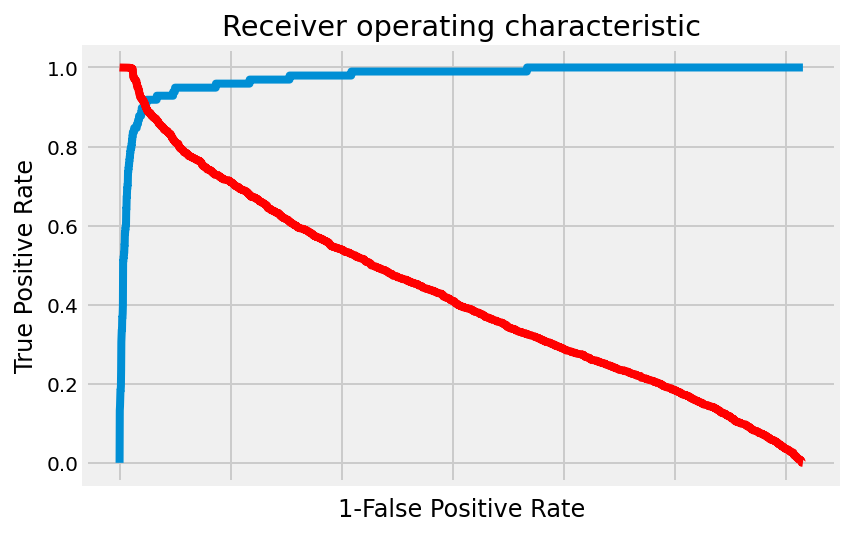

In [28]:
find_optimal_cutoff(Y_test, test_predictions_weighted)

Legitimate Transactions Detected (True Negatives):  51253
Legitimate Transactions Incorrectly Detected (False Positives):  5611
Fraudulent Transactions Missed (False Negatives):  9
Fraudulent Transactions Detected (True Positives):  89
Total Fraudulent Transactions:  98


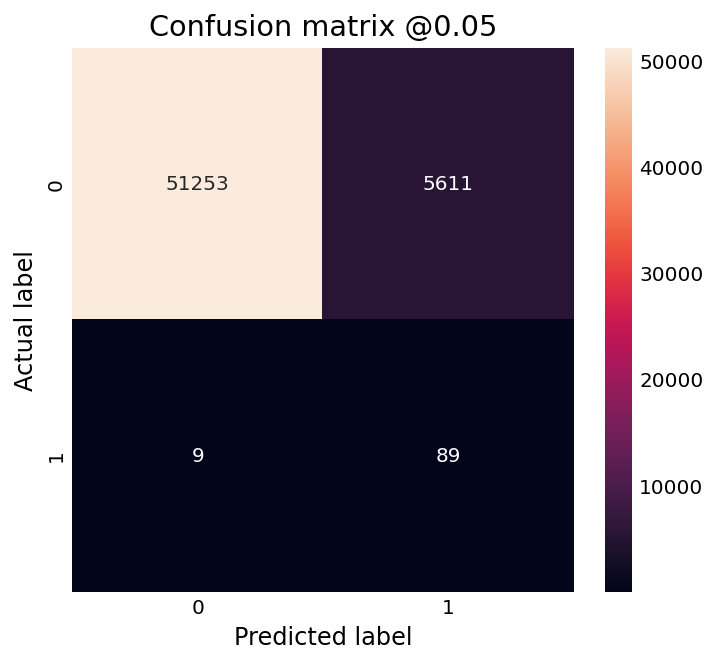

In [29]:
plot_cm(Y_test, test_predictions_weighted, p=0.0454)

In [30]:
print(classification_report(Y_test, test_predictions_weighted>0.21))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.84      0.13        98

    accuracy                           0.98     56962
   macro avg       0.53      0.91      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [31]:
roc_auc_score(Y_test, test_predictions_weighted>0.21)


0.9086775607823321